<a href="https://colab.research.google.com/github/lusala-louis/IoT/blob/main/Ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import random
import csv

# Generate a list of book IDs
book_ids = range(1, 201)

# Define a list of genres
genres = ["Medicine", "Engineering", "Biology", "Chemistry", "Anthropology", "Archaeology", "Literature", "Linguistics", "Law", "History"]

# Generate random reviews for each book (rating scale: 1 to 5)
reviews = [random.randint(1, 5) for _ in range(200)]

# Generate borrow and request counts based on review ratings
borrow_counts = []
request_counts = []

for review in reviews:
    if review >= 4:
        borrow_counts.append(random.randint(50, 100))
        request_counts.append(random.randint(25, 50))
    elif review >= 2:
        borrow_counts.append(random.randint(20, 50))
        request_counts.append(random.randint(10, 25))
    else:
        borrow_counts.append(random.randint(0, 20))
        request_counts.append(random.randint(0, 10))

# Generate the book record using a list of dictionaries
book_record = []
for i in range(200):
    book = {
        "Book ID": book_ids[i],
        "Genre": random.choice(genres),
        "Reviews": reviews[i],
        "Borrow Counts": borrow_counts[i],
        "Request Counts": request_counts[i]
    }
    book_record.append(book)

# Save the book record to a CSV file
fields = ["Book ID", "Genre", "Reviews", "Borrow Counts", "Request Counts"]

with open("book_record.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()
    writer.writerows(book_record)

print("Book record saved to book_record.csv")

Book record saved to book_record.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [16]:
# Load the book record data from the CSV file
book_data = pd.read_csv("book_record.csv")

book_data.head()

,Book ID,Genre,Reviews,Borrow Counts,Request Counts
0,1,Chemistry,3,36,14
1,2,Law,1,16,3
2,3,Engineering,2,31,19
3,4,History,2,36,25
4,5,Archaeology,2,36,16


In [17]:
# Display the correlation matrix
correlation_matrix = book_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                 Book ID   Reviews  Borrow Counts  Request Counts
Book ID         1.000000  0.116255       0.084085        0.118648
Reviews         0.116255  1.000000       0.873521        0.855165
Borrow Counts   0.084085  0.873521       1.000000        0.826084
Request Counts  0.118648  0.855165       0.826084        1.000000


<ipython-input-17-7463851115c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = book_data.corr()


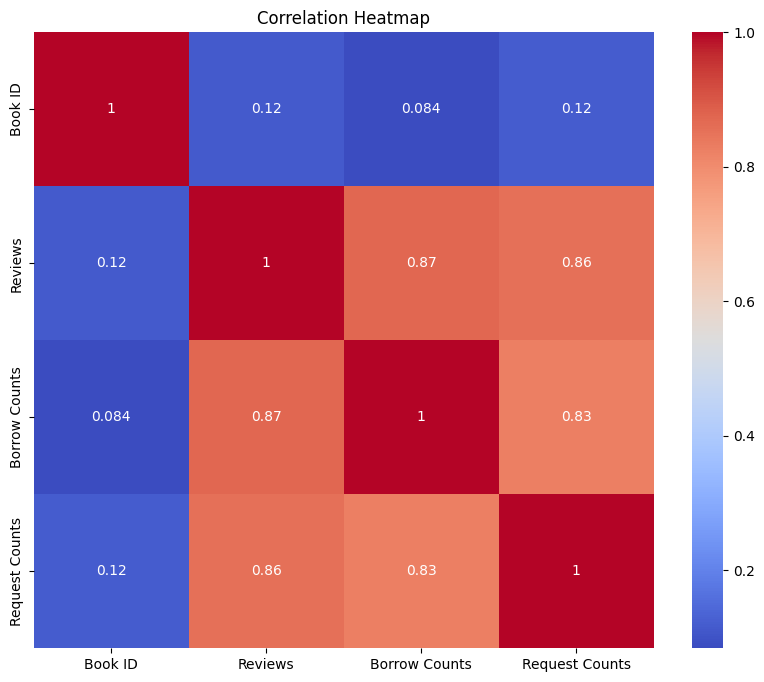

In [18]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Pie chart to show the distribution of different genres**

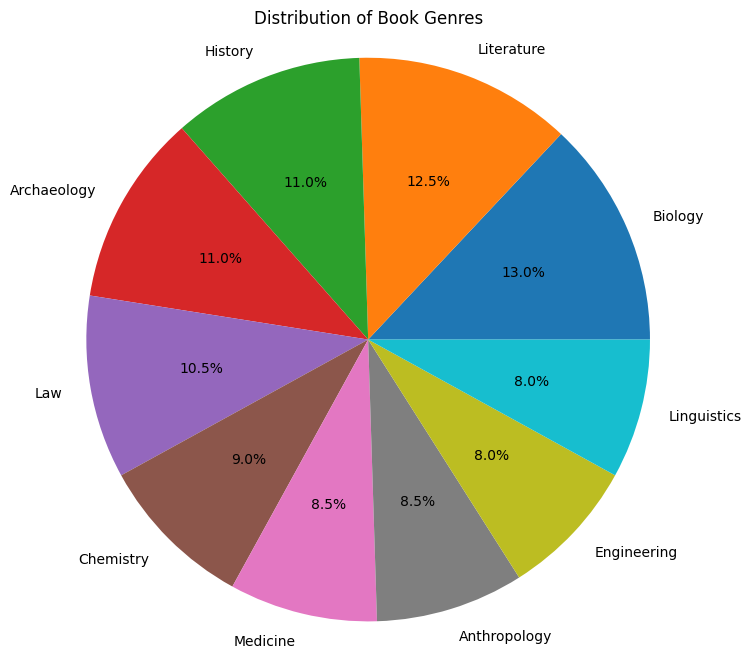

In [20]:
# Count the occurrences of each genre
genre_counts = book_data["Genre"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Book Genres")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

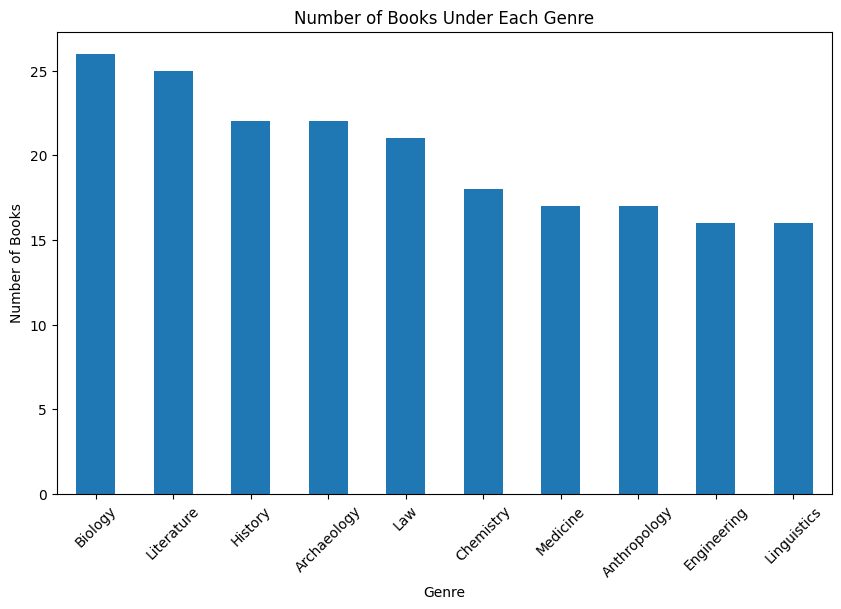

In [22]:
# Count the number of books written by each author
genre_counts = book_data["Genre"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title("Number of Books Under Each Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

**Borrow counts for each genre**

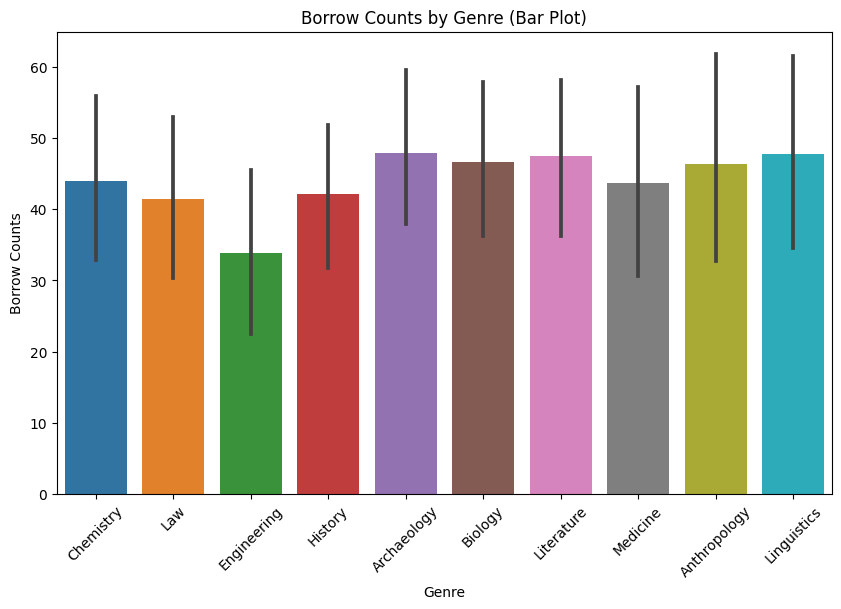

In [28]:
# Create a bar plot of borrow counts for each genre
plt.figure(figsize=(10, 6))
sns.barplot(data=book_data, x="Genre", y="Borrow Counts")
plt.title("Borrow Counts by Genre (Bar Plot)")
plt.xlabel("Genre")
plt.ylabel("Borrow Counts")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

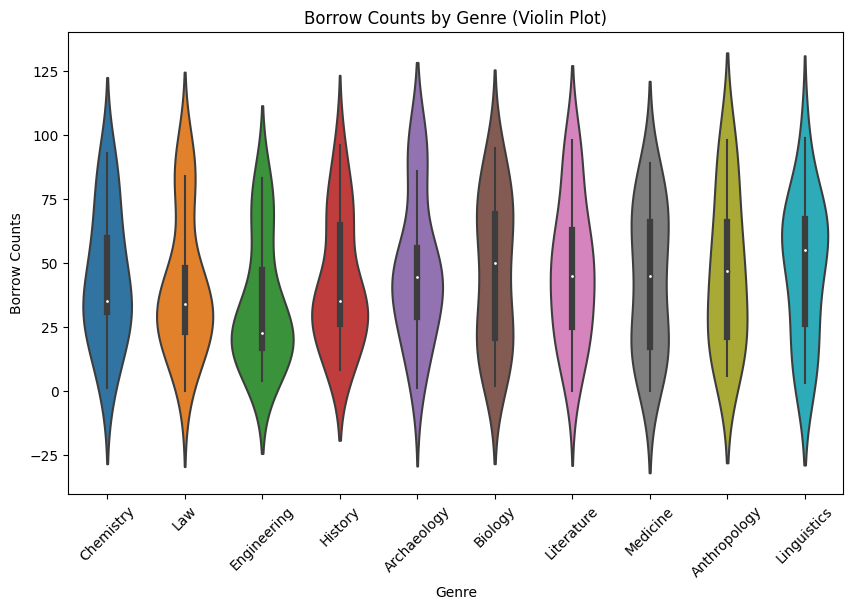

In [27]:
# Create a violin plot of borrow counts for each genre
plt.figure(figsize=(10, 6))
sns.violinplot(data=book_data, x="Genre", y="Borrow Counts")
plt.title("Borrow Counts by Genre (Violin Plot)")
plt.xlabel("Genre")
plt.ylabel("Borrow Counts")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [23]:
# Perform R-squared analysis
reviews = book_data["Reviews"]
borrow_counts = book_data["Borrow Counts"]
slope, intercept = np.polyfit(reviews, borrow_counts, 1)
r_squared = np.corrcoef(reviews, borrow_counts)[0, 1] ** 2

print("R-squared Analysis:")
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared Value:", r_squared)

R-squared Analysis:
Slope: 16.60856960345929
Intercept: -4.233108938135719
R-squared Value: 0.763038496612141


In [24]:
# Perform t-test analysis
high_review_borrow_counts = book_data[book_data["Reviews"] >= 4]["Borrow Counts"]
low_review_borrow_counts = book_data[book_data["Reviews"] < 4]["Borrow Counts"]

t_statistic, p_value = ttest_ind(high_review_borrow_counts, low_review_borrow_counts)

print("T-test Analysis:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-test Analysis:
T-Statistic: 23.548417719158504
P-Value: 2.586414868077438e-59


In [32]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.3 MB/s eta 0:00:00


In [38]:
from sklearn.model_selection import train_test_split
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

In [47]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(book_data, test_size=0.2, random_state=42)

# Define the range of parameter values to search over
p_values = range(0, 3)  # Autoregressive order
d_values = range(0, 2)  # Differencing order
q_values = range(0, 3)  # Moving average order

best_model = None
best_aic = float("inf")

# Perform grid search to find the optimal ARIMA parameters
for params in ParameterGrid({'p': p_values, 'd': d_values, 'q': q_values}):
    try:
        # Fit the ARIMA model with the current parameters
        model = pm.ARIMA(order=(params['p'], params['d'], params['q']))
        model.fit(train_data["Borrow Counts"]);

        # Calculate AIC (Akaike Information Criterion)
        aic = model.aic();

        # Update the best model if AIC is lower
        if aic < best_aic:
            best_model = model
            best_aic = aic
    except:
        continue

# Print the optimal ARIMA parameters
print("Optimal ARIMA parameters: (p={}, d={}, q={})".format(best_model.order[0], best_model.order[1], best_model.order[2]));

# Fit the best model with the training data
best_model.fit(train_data["Borrow Counts"]);

# Predict the future borrowing patterns
predictions = best_model.predict(len(test_data));

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Optimal ARIMA parameters: (p=0, d=1, q=1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


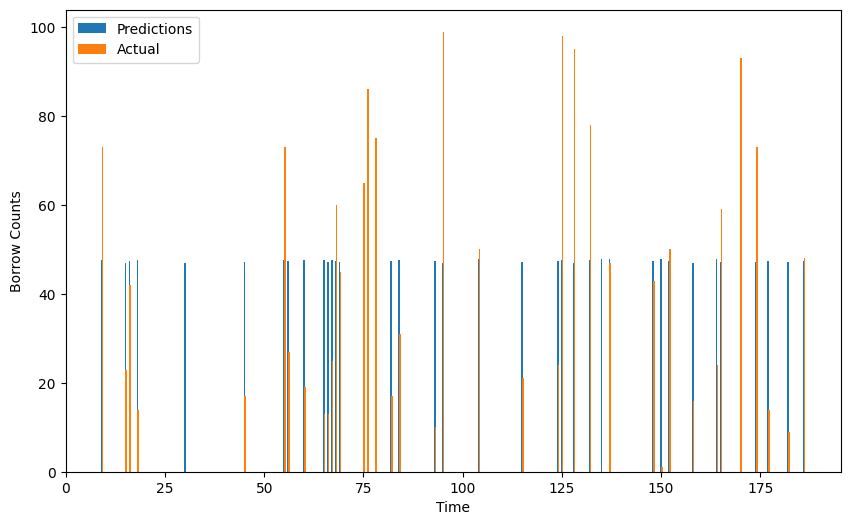

In [48]:
# Plot the predicted and actual values using a combined bar plot
plt.figure(figsize=(10, 6))
plt.bar(test_data.index, predictions, width=0.4, align='center', label='Predictions')
plt.bar(test_data.index, test_data["Borrow Counts"], width=0.4, align='edge', label='Actual')
plt.xlabel("Time")
plt.ylabel("Borrow Counts")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Forecast on the testing data
predictions = best_model.predict(len(test_data))

# Calculate MSE and MAE
mse = mean_squared_error(test_data["Borrow Counts"], predictions)
mae = mean_absolute_error(test_data["Borrow Counts"], predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))

Mean Squared Error (MSE): 918.78
Mean Absolute Error (MAE): 26.48
Root Mean Squared Error (RMSE): 30.31


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
